In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

2025-03-21 23:20:08.867653: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 23:20:08.869470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 23:20:08.878623: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 23:20:08.906798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742595608.958757   40589 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742595608.97

### Load data

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
def plot_image(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title("Label: "+ str(y_train[i]))
    plt.show()

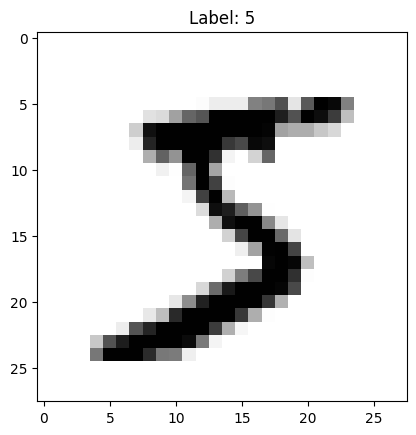

In [5]:
plot_image(0)

### Preprocess Images

In [6]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

In [7]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [8]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/home/yacine/Desktop/2CSSIQ/Computer-Vision-Projects/Python-3.11.9/cv-projects-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-21 23:04:05.612501: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

# callbacks

In [12]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=4,verbose=1,mode='max')
mc = ModelCheckpoint("./bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)
cb=[es,mc]

In [13]:
md=model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=cb)

Epoch 1/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8324 - loss: 0.5271
Epoch 1: val_accuracy improved from -inf to 0.97639, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8326 - loss: 0.5265 - val_accuracy: 0.9764 - val_loss: 0.0796
Epoch 2/5
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9686 - loss: 0.1031
Epoch 2: val_accuracy improved from 0.97639 to 0.98244, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9686 - loss: 0.1030 - val_accuracy: 0.9824 - val_loss: 0.0592
Epoch 3/5
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9780 - loss: 0.0710
Epoch 3: val_accuracy improved from 0.98244 to 0.98317, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9780 - loss: 0.0710 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 4/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9808 - loss: 0.0619
Epoch 4: val_accuracy improved from 0.98317 to 0.98556, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9808 - loss: 0.0619 - val_accuracy: 0.9856 - val_loss: 0.0438
Epoch 5/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9829 - loss: 0.0559
Epoch 5: val_accuracy improved from 0.98556 to 0.98672, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9829 - loss: 0.0559 - val_accuracy: 0.9867 - val_loss: 0.0426


In [14]:
model_S=keras.models.load_model("./bestmodel.h5")

In [15]:
score=model_S.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0401


In [16]:
print(f"the score is {score}")

the score is [0.033588867634534836, 0.9879999756813049]


In [17]:
print(f"The model accuracy is {score[1]}")

The model accuracy is 0.9879999756813049
